In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")


In [211]:
df=pd.read_csv("bankloan.csv")
df=df.drop(["ID"],axis=1)
df.shape

(5000, 13)

In [212]:
df.head()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [213]:
df.size

65000

In [214]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIP.Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0
Securities.Account,0


In [215]:
df.duplicated().sum()

np.int64(0)

In [216]:
df.describe()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [217]:
df=df[df["Experience"]>=0]

<Axes: >

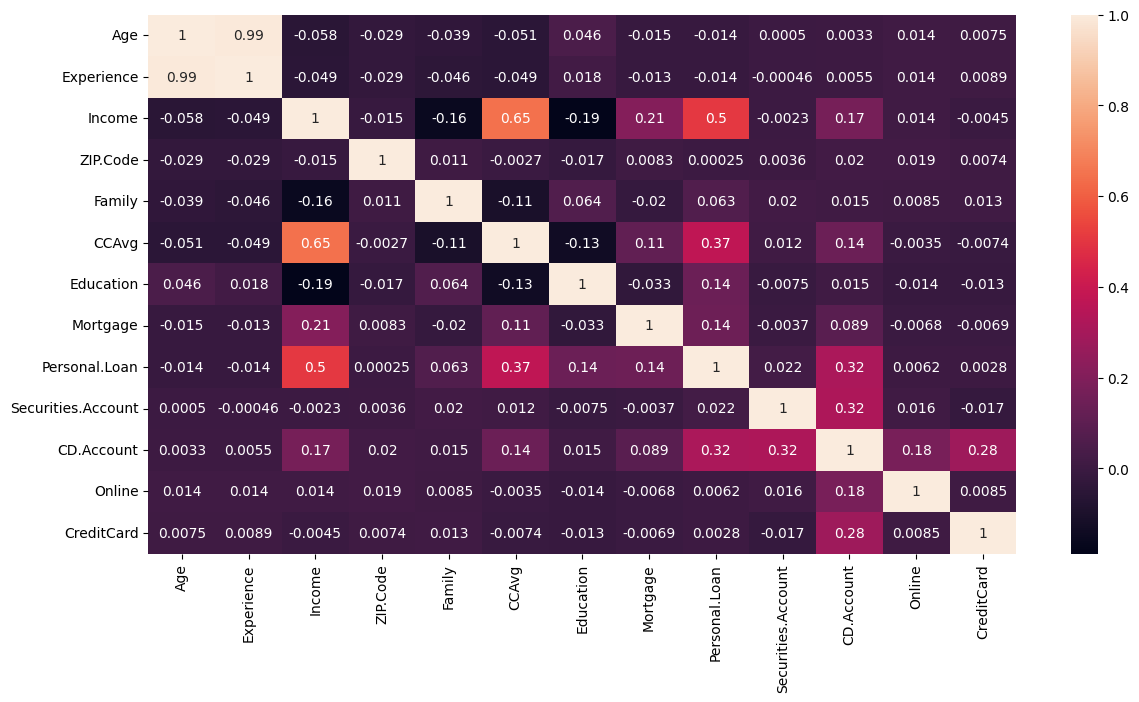

In [218]:
cor=df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True)

In [219]:
df__0=df[df["Personal.Loan"]==0]
df_1=df[df["Personal.Loan"]==1]
print(f'The number of people got the loan are {len(df_1)}')
print(f'The number of people not got the loan are {len(df__0)}')
df_0=df__0.sample(n=480,random_state=40)
df_final=pd.concat([df_0,df_1],axis=0)
print()
print("After balancing the data")
print(f'The number of people got the loan are {len(df_1)}')
print(f'The number of people not got the loan are {len(df_0)}')

The number of people got the loan are 480
The number of people not got the loan are 4468

After balancing the data
The number of people got the loan are 480
The number of people not got the loan are 480


**Data was imbalances so we have balanced the data by randomly select the instances for people who didn't get the loan.**

<Axes: >

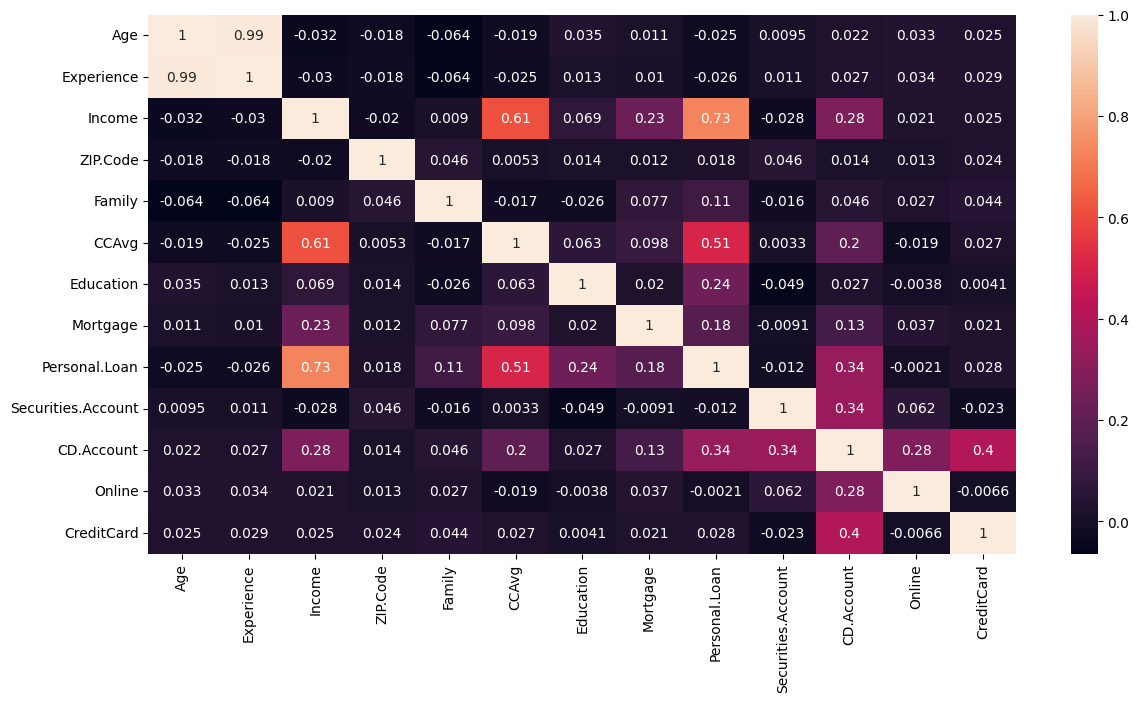

In [220]:
corr=df_final.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)

1. **We have dropped "Experience","Zip code","Online Banking" and "Credit card"
features due to very low correlation with target variable.**

In [221]:
df=df_final.drop(["Age","Experience","ZIP.Code","Online","CreditCard","Securities.Account","CCAvg"],axis=1)
df=df.reset_index(drop=True)
df.head()

,Income,Family,Education,Mortgage,Personal.Loan,CD.Account
0,44,4,1,0,0,0
1,72,1,1,178,0,0
2,49,4,2,0,0,0
3,112,4,3,402,0,0
4,79,2,1,0,0,0


Text(0.5, 1.0, 'Heatmap of Correlation')

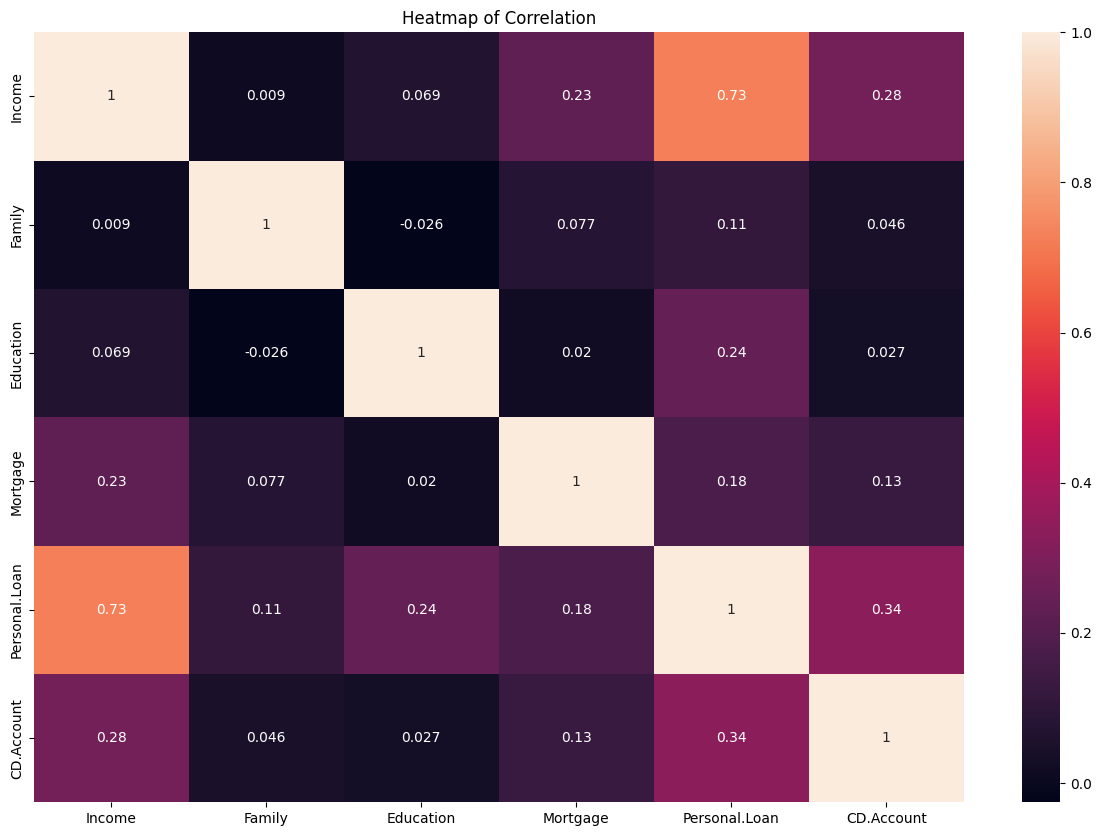

In [222]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.title("Heatmap of Correlation")

1. **Personal loan is highly correlated with income and CC Avg,**
2. **CCavg and Income has high multicolinearity.**

In [223]:
df.columns

Index(['Income', 'Family', 'Education', 'Mortgage', 'Personal.Loan',
       'CD.Account'],
      dtype='object')

In [224]:
skewness={}
for i in df.columns[0:2].append(df.columns[3:4].append(df.columns[5:6])):
  val=df[i].skew()
  skewness[i]=val

pd.DataFrame([skewness])

,Income,Family,Mortgage,CD.Account
0,-0.081634,0.028431,1.845458,1.791655


**"Age" and "Income" features are Normally distributed while, "CCavg" and "Mortage" are Right skewed**

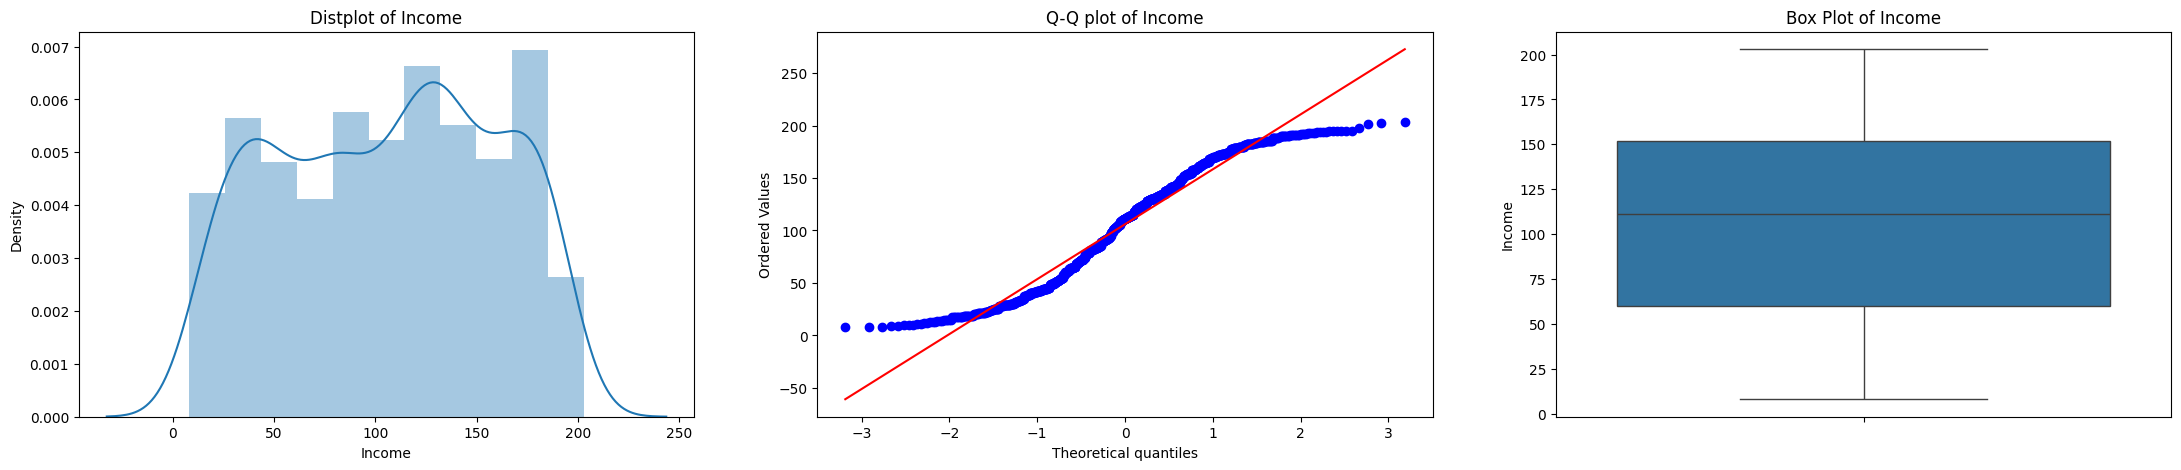

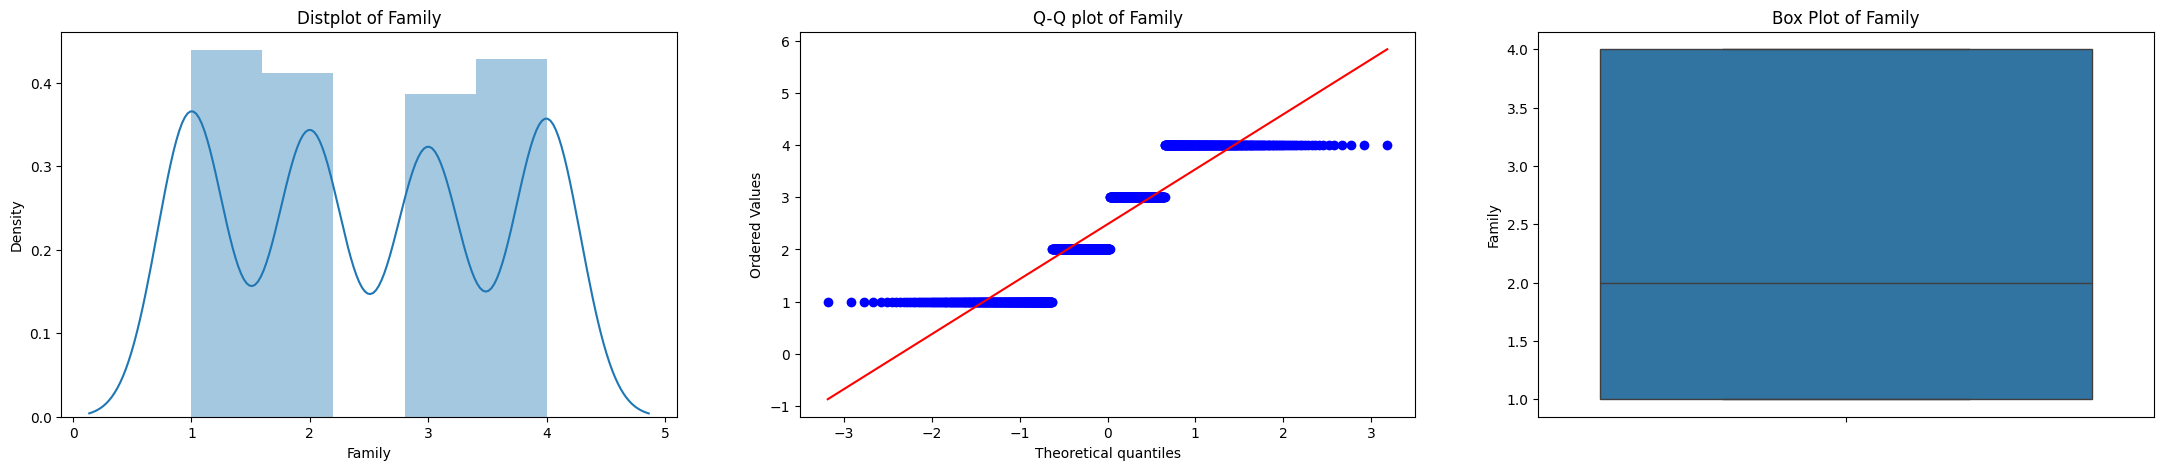

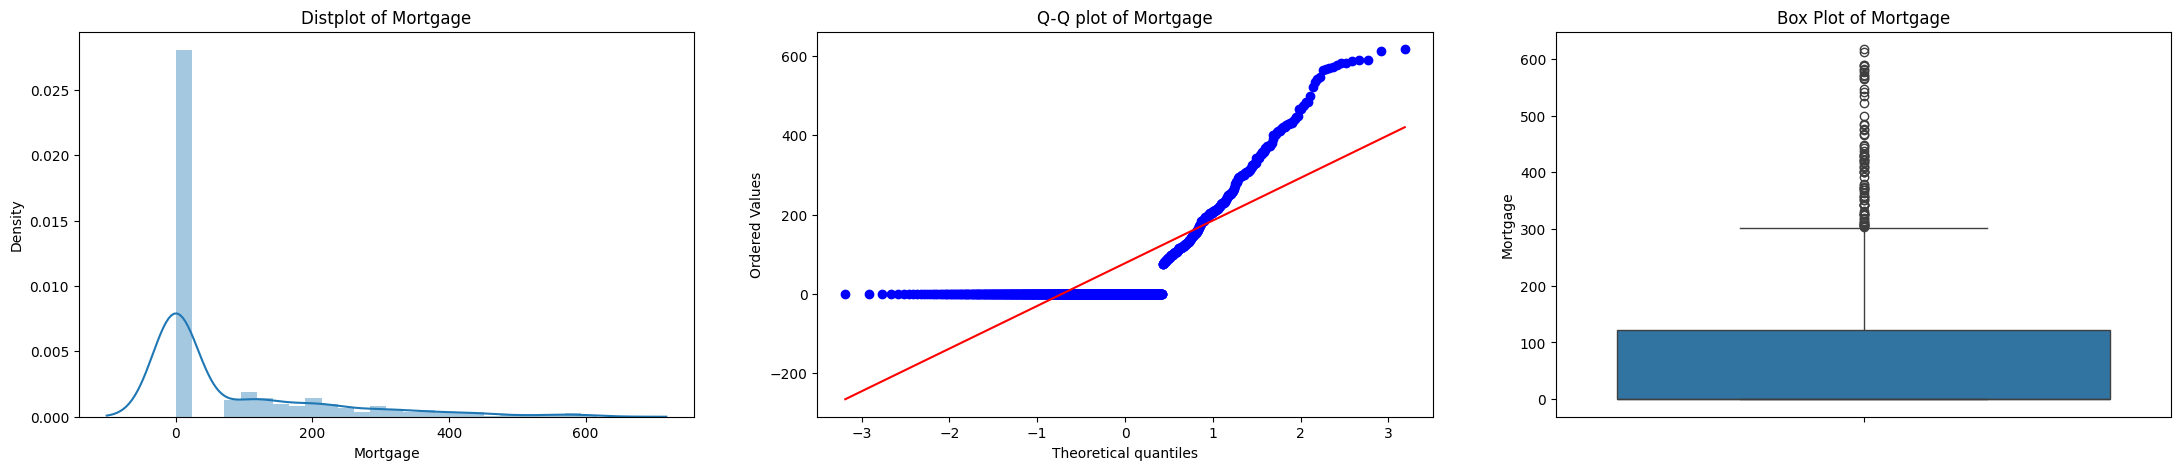

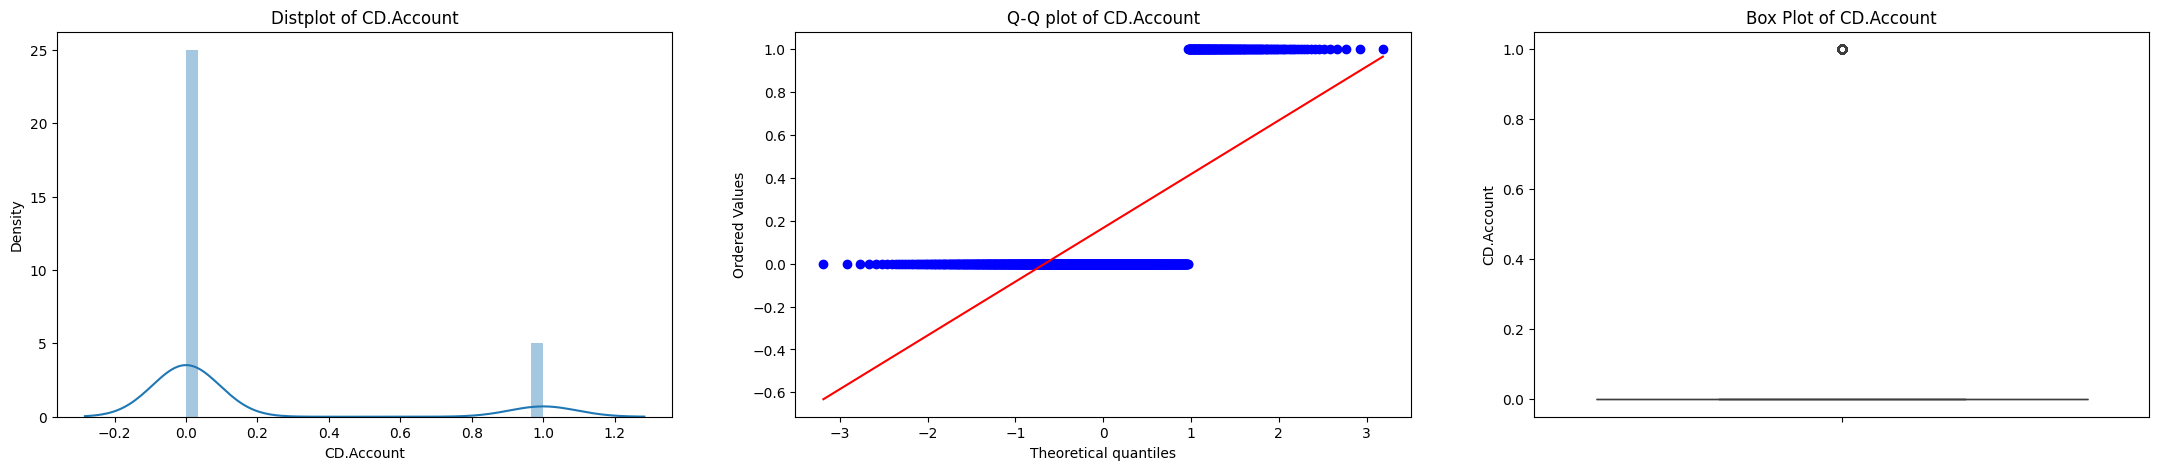

In [225]:
for i in df.columns[0:2].append(df.columns[3:4].append(df.columns[5:6])):
  plt.figure(figsize=(27,5))
  plt.subplot(131)
  sns.distplot(df[i])
  plt.title(f"Distplot of {i}")

  plt.subplot(132)
  sts.probplot(df[i],plot=plt)
  plt.title(f"Q-Q plot of {i}")
  plt.subplot(133)
  sns.boxplot(df[i])
  plt.title(f"Box Plot of {i}")

  plt.show()

**"CCAvg" and "Mortage" features consists outliers**

Text(0.5, 1.0, 'distplot of CD.Account')

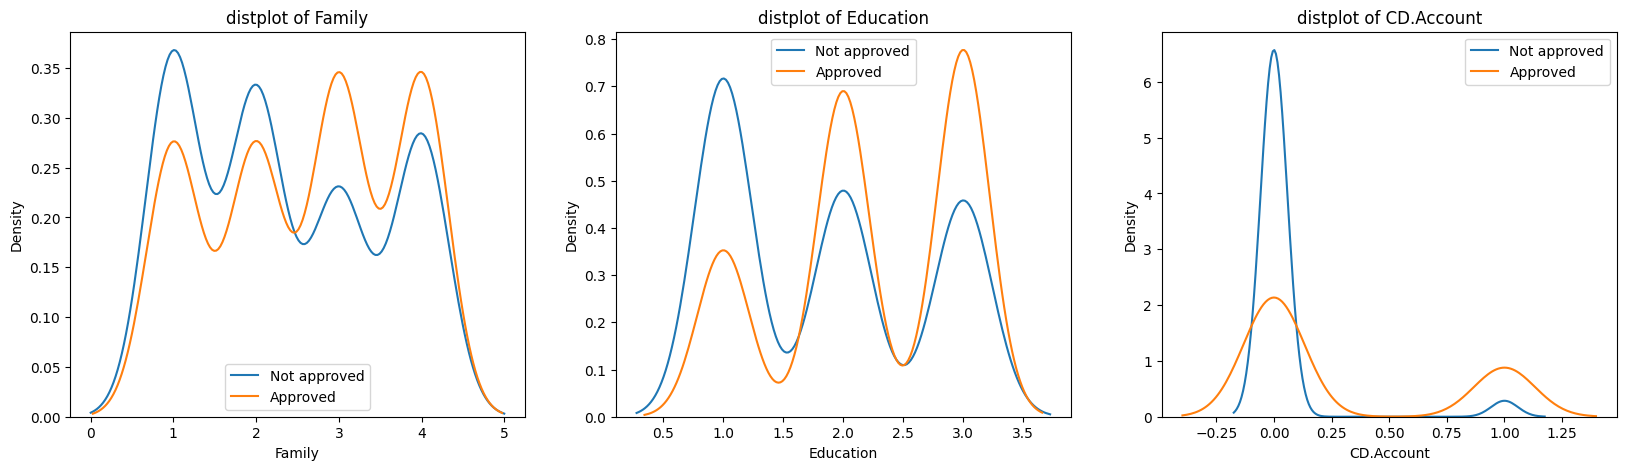

In [226]:
plt.figure(figsize=(27,5))
plt.subplot(141)
sns.distplot(df[df["Personal.Loan"]==0]["Family"],label="Not approved",hist=False)
sns.distplot(df[df["Personal.Loan"]==1]["Family"],label="Approved",hist=False)
plt.legend()
plt.title("distplot of Family")

plt.subplot(142)
sns.distplot(df[df["Personal.Loan"]==0]["Education"],label="Not approved",hist=False)
sns.distplot(df[df["Personal.Loan"]==1]["Education"],label="Approved",hist=False)
plt.legend()
plt.title("distplot of Education")

plt.subplot(143)
sns.distplot(df[df["Personal.Loan"]==0]["CD.Account"],label="Not approved",hist=False)
sns.distplot(df[df["Personal.Loan"]==1]["CD.Account"],label="Approved",hist=False)
plt.legend()
plt.title("distplot of CD.Account")



1. **Person with family members 1 is most likely to get disapproval for loan.**
2. **Highly educated persons are most likely to get loan.**
3.  **Person with CD account are most likely to get loan.**

Text(0.5, 1.0, 'Pie Chart of CD.Account')

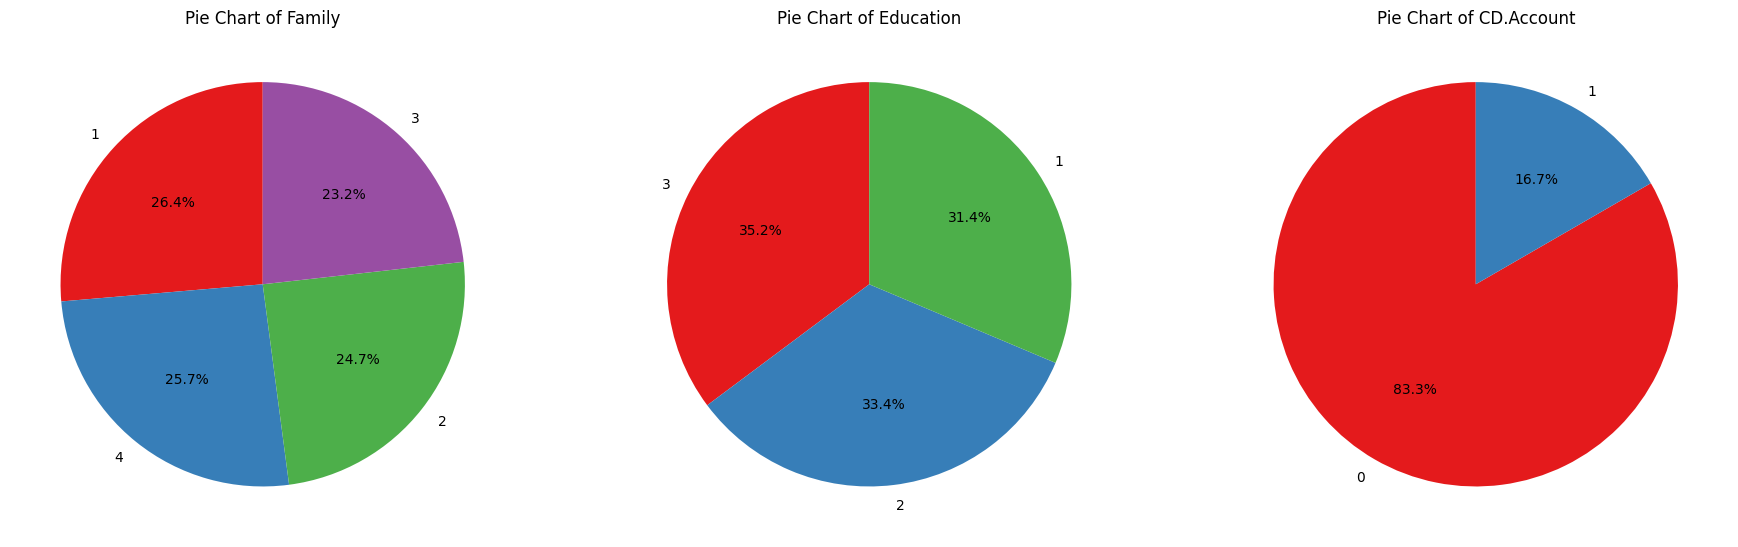

In [227]:
cat_count_Family=df["Family"].value_counts()
cat_count_Education=df["Education"].value_counts()
cat_count_CDAcc=df["CD.Account"].value_counts()


cat_list=[cat_count_Family,cat_count_Education,cat_count_CDAcc,cat_count_SecurityACC]
plt.figure(figsize=(30,8))
plt.subplot(141)
_=plt.pie(cat_list[0],labels=cat_list[0].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of Family")

plt.subplot(142)
_=plt.pie(cat_list[1],labels=cat_list[1].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of Education")

plt.subplot(143)
_=plt.pie(cat_list[2],labels=cat_list[2].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of CD.Account")


**Here, we can see the distribution of Family, Education,CD Account,Security Accounts**
1. There are most of the people without CD account.

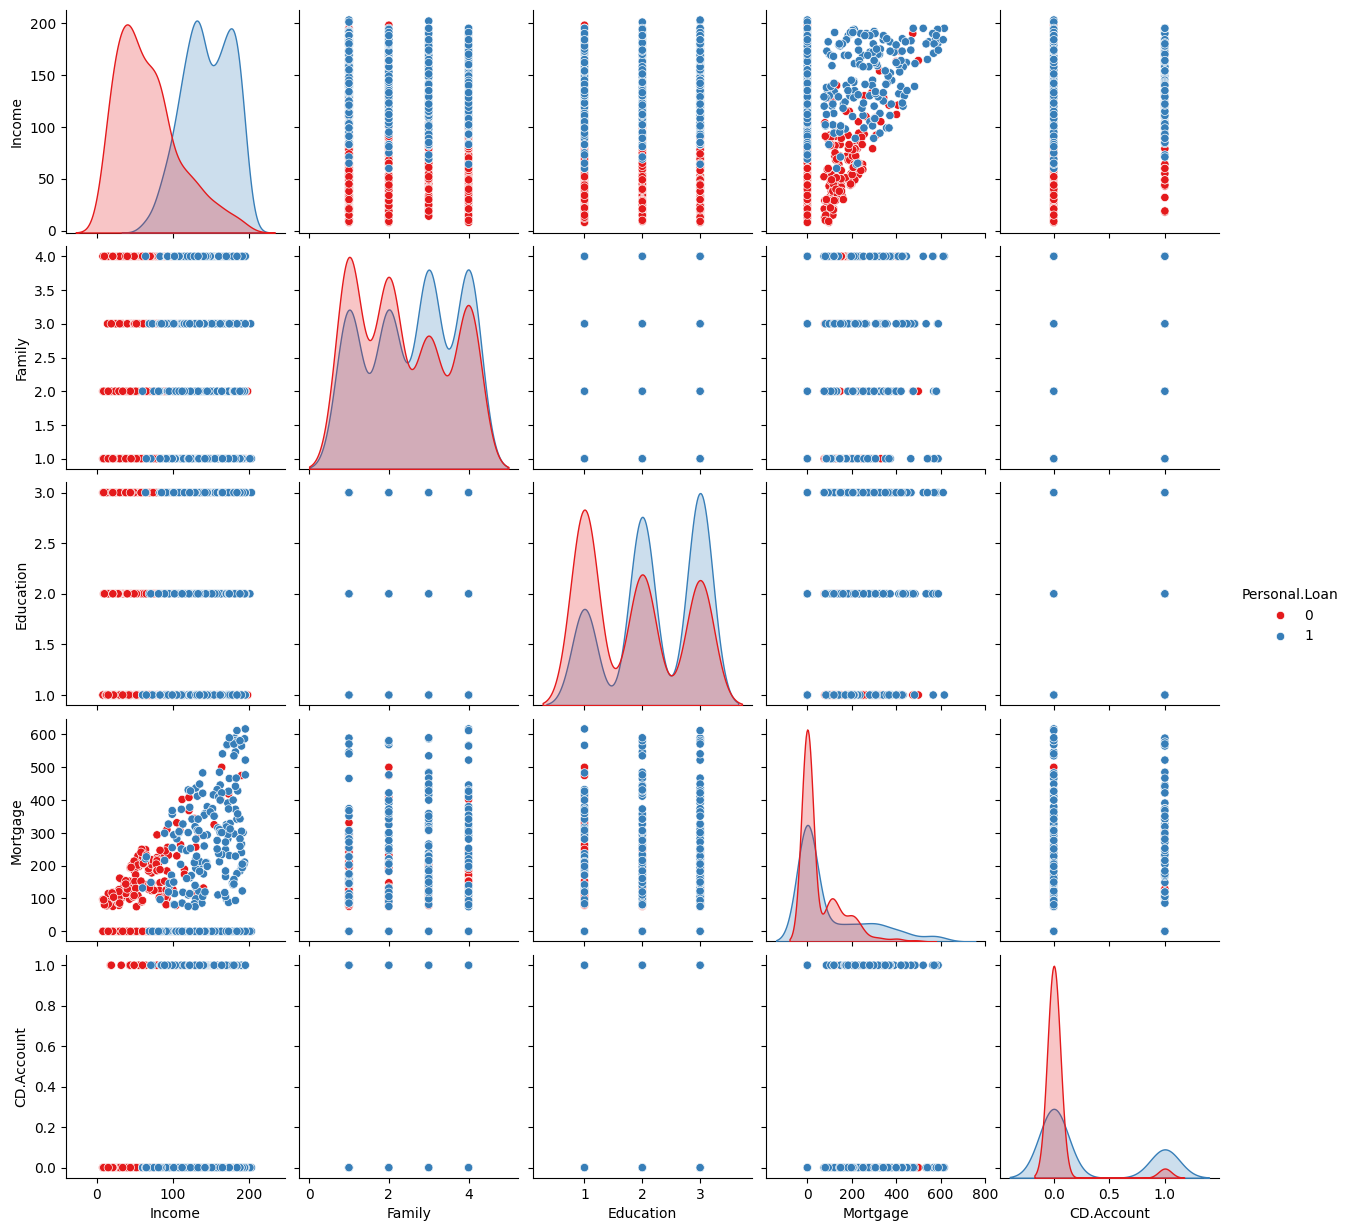

In [228]:
sns.pairplot(df,hue="Personal.Loan",palette="Set1")

**People with high income, CC Avg, Mortage and Eduction level are most likely to get a Personal loan**

In [229]:
# from ydata_profiling import ProfileReport
# prof=ProfileReport(df)
# prof.to_file(output_file="bankloan.html")

In [230]:
df_num_col=df.select_dtypes(include="number").columns
def outliers(df, df_num_col):
    lower_lim = []
    upper_lim = []
    outlier_num = []
    for col in df_num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_lim = round((Q1 - 1.5 * IQR), 0)
        Upper_lim = round((Q3 + 1.5 * IQR), 0)
        lower_lim.append(Lower_lim)
        upper_lim.append(Upper_lim)
        outliers_in_column = df[(df[col] < Lower_lim) | (df[col] > Upper_lim)]
        outlier_num.append(len(outliers_in_column))
    outlier_df = pd.DataFrame({
        'Column': df_num_col,
        'Lower Limit': lower_lim,
        'Upper Limit': upper_lim,
        'No of Outliers': outlier_num
    })

    return outlier_df



outliers(df,df_num_col)

,Column,Lower Limit,Upper Limit,No of Outliers
0,Income,-78.0,290.0,0
1,Family,-4.0,8.0,0
2,Education,-2.0,6.0,0
3,Mortgage,-182.0,304.0,82
4,Personal.Loan,-2.0,2.0,0
5,CD.Account,0.0,0.0,160


In [231]:
for i in df_num_col[3:6]:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_lim=Q1-1.5*IQR
  upper_lim=Q3+1.5*IQR
  filt_df=df[(df[i]>=lower_lim) & (df[i]<=upper_lim)]


outliers(filt_df,df_num_col)

,Column,Lower Limit,Upper Limit,No of Outliers
0,Income,-84.0,276.0,0
1,Family,-4.0,8.0,0
2,Education,-2.0,6.0,0
3,Mortgage,-172.0,288.0,65
4,Personal.Loan,-2.0,2.0,0
5,CD.Account,0.0,0.0,0


**After applying IQR method for trimming outliers and get rid of outliers.**

In [232]:
filt_df.isnull().sum()

,0
Income,0
Family,0
Education,0
Mortgage,0
Personal.Loan,0
CD.Account,0


In [233]:
x=filt_df.drop(["Personal.Loan"],axis=1)
y=filt_df["Personal.Loan"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"The shape of X_train is {X_train.shape}\n The shape of X_test is {X_test.shape}\n The shape of Y_train is {Y_train.shape} \n The shape of Y_test is {Y_test.shape}")

The shape of X_train is (640, 5)
 The shape of X_test is (160, 5)
 The shape of Y_train is (640,) 
 The shape of Y_test is (160,)


In [234]:
skewness={}
for i in df.columns[0:2].append(df.columns[3:4].append(df.columns[5:6])):
  val=X_train[i].skew()
  skewness[i]=val

pd.DataFrame([skewness])

,Income,Family,Mortgage,CD.Account
0,0.10937,0.134485,1.912586,0.0


In [242]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Models + parameter grids
models_params = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {"max_depth": [3, 5, 10, None], "criterion": ["gini", "entropy"]}
    ),
    "SVM": (
        SVC(),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {"n_estimators": [50, 100], "max_depth": [3, 5, None]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.2]}
    ),
    "AdaBoost": (
        AdaBoostClassifier(),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 1]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="mlogloss", use_label_encoder=False),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
    )
}

# Store results
results = []

for name, (model, params) in models_params.items():
    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, Y_train)

    y_pred = grid.best_estimator_.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Best CV Score": grid.best_score_,
        "Test Accuracy": acc
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Best Params,Best CV Score,Test Accuracy
0,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.885938,0.8625
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 3}",0.950000,0.9375
2,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.884375,0.8625
3,Random Forest,"{'max_depth': 3, 'n_estimators': 100}",0.950000,0.9375
4,Gradient Boosting,"{'learning_rate': 0.01, 'n_estimators': 50}",0.950000,0.9375
5,AdaBoost,"{'learning_rate': 1, 'n_estimators': 50}",0.878125,0.8750
6,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.951562,0.9375


In [247]:
model_rf=RandomForestClassifier(max_depth=3,n_estimators=100)
model_rf.fit(X_train,Y_train)
y_pred=model_rf.predict(X_test)
score=round(model_rf.score(X_test,Y_test),3)
print(f'Accuracy is {score*100}%')

Accuracy is 93.8%


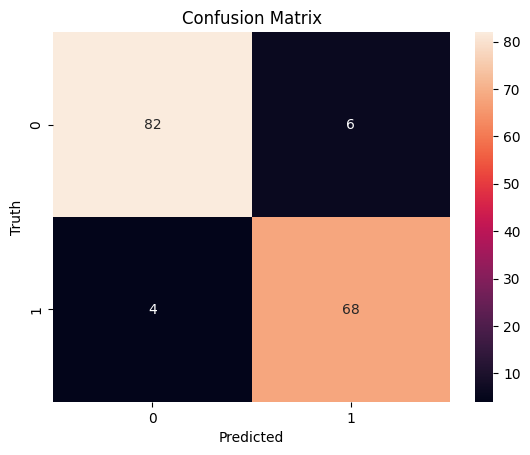

In [248]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(Y_test,y_pred)
sns.heatmap(con,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
_=plt.ylabel("Truth")

In [249]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(Y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        88
           1       0.92      0.94      0.93        72

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160



In [251]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

